[JD](https://jobs.sapphireventures.com/companies/splashtop/jobs/36415021-data-analyst)

error: cannot pull with rebase: You have unstaged changes.
error: please commit or stash them.


[main b25130d] Initial commit from Google Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Splash Workbook.ipynb (76%)
To https://github.com/ycbq999/Sentiment_Analysis_Splahtop_CustomerReview.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/ycbq999/Sentiment_Analysis_Splahtop_CustomerReview.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)  # Prevents truncation of column text
pd.set_option('display.width', 1000)  # Adjusts the display width for better visibility

data_path = '/content/drive/MyDrive/Colab Notebooks/Splashtop/Sentiment Analysis and Segmentation.csv'

df = pd.read_csv(data_path)

df.head()

,_unit_id,review
0,679455653,"I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care."
1,679455654,"Terrible customer service. ŒæI came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. ŒæThere was no one else waiting for their food inside either, just outside at the window. Œæ I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers."
2,679455655,"First they ""lost"" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, ""my order"".They asked for my ticket and the asst mgr looked at the ticket then incompletely filled it.I had to ask her to check to see if she filled it correctly.She acted as if she couldn't be bothered with that so I asked her again.She begrudgingly checked to she did in fact miss something on the ticket.So after 22 minutes I finally had my breakfast biscuit platter.As I left an woman approached and identified herself as the manager, she was dressed as if she had just awoken in an old t-shirt and sweat pants.She said she had heard what happened and said she'd take care of it.Well why didn't she intervene when she saw I was growing annoyed with the incompetence?"
3,679455656,I see I'm not the only one giving 1 star. Only because there is not a -25 Star!!! That's all I need to say!
4,679455657,"Well, it's McDonald's, so you know what the food is. ŒæThis review reflects solely on the poor service. ŒæI have been to this location countless times over the years. ŒæThey consistently fail on the service end of things. ŒæThe order takers tend to be rude, no smiles, and a lot of ""sighs"" and ""lip smacking"" when you talk to them. ŒæSo why go back you ask? This store benefits from being the only place to eat in this area. ŒæThe next stop is at least 12 minutes away on the other side of town. ŒæAlso I strongly believe in 2nd chances and know that not every business can satisfy everyone 100% of the time. ŒæI have given them many chances at earning a positive review. ŒæI could not recommend this location any less. ŒæIf you can wait, take a pass. ŒæThere are better McDonald's stores in Griffin, GA."


## Preprocessing and cleaning

### 1. Lower Case

In [ ]:
df['review'] = df['review'].apply(lambda x: str(x).lower())


### 2. Contraction to Expansion

In [ ]:
contractions = {
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have",
"didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have",
"he'll": "he will","he'll've": "he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how does","i'd": "i would","i'd've": "i would have",
"i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have",
"mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have",
"shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have",
"she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that would","that'd've": "that would have",
"that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have",
"they're": "they are","they've": "they have","to've": "to have","wasn't": "was not"," u ": " you "," ur ": " your "," n ": " and ","won't": "would not",'dis': 'this','bak': 'back','brng': 'bring'}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df['review'] = df['review'].apply(lambda x: cont_to_exp(x))

### 3. Special Chars removal or punctuation removal

In [ ]:
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

### 4. Remove Accented Chars

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
df['review'] = df['review'].apply(lambda x: remove_accented_chars(x))

In [ ]:
df.head(20)

,_unit_id,review
0,679455653,i am not a huge mcds lover but i have been to better ones this is by far the worst one i have ever been too it is filthy inside and if you get drive through they completely screw up your order every time the staff is terribly unfriendly and nobody seems to care
1,679455654,terrible customer service i came in at 930pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes there was no one else waiting for their food inside either just outside at the window i left and went to chickfila next door and was greeted before i was all the way inside this mcdonalds is also dirty the floor was covered with dropped food obviously filled with surly and unhappy workers
2,679455655,first they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my orderthey after i was asked what i needed i replied my orderthey asked for my ticket and the asst mgr looked at the ticket then incompletely filled iti had to ask her to check to see if she filled it correctlyshe acted as if she could not be bothered with that so i asked her againshe begrudgingly checked to she did in fact miss something on the ticketso after 22 minutes i finally had my breakfast biscuit platteras i left an woman approached and identified herself as the manager she was dressed as if she had just awoken in an old tshirt and sweat pantsshe said she had heard what happened and said she would take care of itwell why did not she intervene when she saw i was growing annoyed with the incompetence
3,679455656,i see i am not the only one giving 1 star only because there is not a 25 star that is all i need to say
4,679455657,well it is mcdonalds so you know what the food is this review reflects solely on the poor service i have been to this location countless times over the years they consistently fail on the service end of things the order takers tend to be rude no smiles and a lot of sighs and lip smacking when you talk to them so why go back you ask this store benefits from being the only place to eat in this area the next stop is at least 12 minutes away on the other side of town also i strongly believe in 2nd chances and know that not every business can satisfy everyone 100 of the time i have given them many chances at earning a positive review i could not recommend this location any less if you can wait take a pass there are better mcdonalds stores in griffin ga
5,679455658,this has to be one of the worst and slowest mcdonalds franchises there is cannot figure out why my egg mcmuffin is always on a stale untoasted english muffin bought a chocolate shake today and threw it away
6,679455659,i am not crazy about this mcdonalds this is primarily because they are so slow my gosh what exactly is the hold up it is fast food people also this morning i guess the worker thought his mic was off but it was not i now know that he is trying to get as many hours as possible because he needs money bad spread the word anyway this location is on a little access road and you have to go back the way you came because there is no exit from it at the other end it would have helped if there was one so in the end i think i will avoid this location and find another this should be easy as there is no shortage of mickey ds in this piece
7,679455660,one star and i am beng kind i blame management last day of free coffee so we decide to stop and order breakfast and coffees thru drivethru she charged us for coffee and when asked why she said she needed to confirm there were two of us in the car now she has to clear the order and that took retraining ask next time at tthe speakeroh it gets betterwe get to next window where einstein is waiting pours the coffees with different creamssugars added which one is which i asked and he smiled and said one has 2 cream 2 sugar and the other has 3 cream 1 sugar didnt maek the cups but at least he made sure we had straws for our coffees hello mana

In [ ]:
reviews = df['review'].tolist()
print(len(reviews))

1525


## Summarize Reviews

In [ ]:
from transformers import pipeline

# Load a summarization model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Create a list to store the summaries
summarized_reviews = []

# Process each review with progress tracking
for i, review in enumerate(reviews, start=1):
    try:
        # Print the progress
        print(f"Processing review {i}/{len(reviews)}")

        # Summarize only if the review has more than 50 words
        if len(review.split()) > 50:
            # Attempt to summarize the review
            summary = summarizer(review, max_length=50, min_length=20, do_sample=False)[0]['summary_text']
        else:
            summary = review  # Use the original text if it's already short
    except IndexError:
        # If an IndexError occurs, skip summarization and use the original review
        print(f"IndexError occurred for the following review {i}/{len(reviews)}:\n{review}")
        summary = review
    except Exception as e:
        # Catch any other potential errors and log them or handle them appropriately
        print(f"An error occurred while processing the following review {i}/{len(reviews)}:\n{review}")
        print(f"Error details: {e}")
        summary = review  # Use the original review in case of an error

    summarized_reviews.append(summary)

print("Summarization complete.")

Processing review 1/1525
Processing review 2/1525
Processing review 3/1525
Processing review 4/1525
Processing review 5/1525
Processing review 6/1525
Processing review 7/1525
Processing review 8/1525
Processing review 9/1525
Processing review 10/1525
Processing review 11/1525
Processing review 12/1525
Processing review 13/1525
Processing review 14/1525
Processing review 15/1525
Processing review 16/1525
Processing review 17/1525
Processing review 18/1525
Processing review 19/1525
Processing review 20/1525
Processing review 21/1525
Processing review 22/1525
Processing review 23/1525
Processing review 24/1525
Processing review 25/1525
Processing review 26/1525
Processing review 27/1525
Processing review 28/1525
Processing review 29/1525
Processing review 30/1525
Processing review 31/1525
Processing review 32/1525
Processing review 33/1525
Processing review 34/1525
Processing review 35/1525
Processing review 36/1525
Processing review 37/1525
Processing review 38/1525
Processing review 39/

Token indices sequence length is longer than the specified maximum sequence length for this model (1048 > 1024). Running this sequence through the model will result in indexing errors


Processing review 243/1525
Processing review 244/1525
Processing review 245/1525
IndexError occurred for the following review 245/1525:
it is 2 for 1 review day i cannot review the walmart without reviewing the mcdonalds that resides inside and boy is it some tantalizing stuffi try not to give too many 1star reviews but this mcdonalds so deserves it i hardly frequent a mcdonalds at all although this is my second mcdonalds review in less than a week but i need to let the peeps in on this one no yelper should go unwarned of course i came to mcdonalds since i have those coupons for their new contraption the mcwrap which when i pronounce very fast and in my scottish accent sounds much like mccrap after my second go round with this thing i have made up my mind it is decidedly so i need to write mcdonalds execs to change the name on this thing immediatelymy coupon for the day was buy a medium fries and a medium drink get a mcwrap of your choice for free i have a hard time resisting free i am

In [ ]:
# Assuming 'reviews' is the original list of reviews
# and 'summarized_reviews' is the list of summarized or processed reviews

# Create a DataFrame from the original and summarized reviews
df = pd.DataFrame({
    'Original Review': reviews,
    'Summarized Review': summarized_reviews
})

# Output the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Splashtop/summarized_reviews.csv', index=False)

print("Summarized reviews have been saved to 'summarized_reviews.csv'.")

Summarized reviews have been saved to 'summarized_reviews.csv'.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Splashtop/summarized_reviews.csv')

summarized_reviews = df['Summarized Review'].tolist()


### Filter Negative Reviews

In [ ]:
from transformers import pipeline

# Load sentiment analysis model
sentiment_analyzer = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Initialize a list to store sentiment results
sentiments = []

# Process each review with error handling and progress tracking
for i, review in enumerate(summarized_reviews, start=1):
    try:
        # Print the progress
        print(f"Processing review {i}/{len(summarized_reviews)}")

        # Analyze sentiment
        sentiment = sentiment_analyzer(review)[0]
        sentiments.append(sentiment)
    except Exception as e:
        # Handle any errors that arise during sentiment analysis
        print(f"An error occurred while processing review {i}/{len(summarized_reviews)}: {review}")
        print(f"Error details: {e}")
        sentiments.append({'label': 'UNKNOWN', 'score': 0})  # Append a default value or handle it as needed

print("Sentiment analysis complete.")



df = pd.DataFrame({
    'summarized_reviews': summarized_reviews,
    'sentiments': sentiments
})

# Output the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Splashtop/sentiment_reviews.csv', index=False)

print("sentiment reviews have been saved to 'sentiment_reviews.csv'.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Processing review 1/1525
Processing review 2/1525
Processing review 3/1525
Processing review 4/1525
Processing review 5/1525
Processing review 6/1525
Processing review 7/1525
Processing review 8/1525
Processing review 9/1525
Processing review 10/1525
Processing review 11/1525
Processing review 12/1525
Processing review 13/1525
Processing review 14/1525
Processing review 15/1525
Processing review 16/1525
Processing review 17/1525
Processing review 18/1525
Processing review 19/1525
Processing review 20/1525
Processing review 21/1525
Processing review 22/1525
Processing review 23/1525
Processing review 24/1525
Processing review 25/1525
Processing review 26/1525
Processing review 27/1525
Processing review 28/1525
Processing review 29/1525
Processing review 30/1525
Processing review 31/1525
Processing review 32/1525
Processing review 33/1525
Processing review 34/1525
Processing review 35/1525
Processing review 36/1525
Processing review 37/1525
Processing review 38/1525
Processing review 39/

Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 512). Running this sequence through the model will result in indexing errors


Processing review 245/1525
An error occurred while processing review 245/1525: it is 2 for 1 review day i cannot review the walmart without reviewing the mcdonalds that resides inside and boy is it some tantalizing stuffi try not to give too many 1star reviews but this mcdonalds so deserves it i hardly frequent a mcdonalds at all although this is my second mcdonalds review in less than a week but i need to let the peeps in on this one no yelper should go unwarned of course i came to mcdonalds since i have those coupons for their new contraption the mcwrap which when i pronounce very fast and in my scottish accent sounds much like mccrap after my second go round with this thing i have made up my mind it is decidedly so i need to write mcdonalds execs to change the name on this thing immediatelymy coupon for the day was buy a medium fries and a medium drink get a mcwrap of your choice for free i have a hard time resisting free i am here to tell youworst almost free meal of my life seriou

In [ ]:

# Now you can proceed to filter negative reviews as before
negative_reviews = [review for review, sentiment in zip(summarized_reviews, sentiments) if sentiment['label'] == 'NEGATIVE']

print(negative_reviews)

[' i am not a huge mcds lover but i have been to better ones this is by far the worst one i have ever been too it is filthy inside and if you get drive through they completely screw up your order every time the staff', ' terrible customer service i came in at 930pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes . There was no one else waiting for their food inside either just outside at the window', ' First they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my orderthey . After 22 minutes i finally had my breakfast biscuit platteras i left an', 'i see i am not the only one giving 1 star only because there is not a 25 star that is all i need to say', ' This review reflects solely on the poor service . The order takers tend to be rude no smiles and a lot of sighs and lip smacking when you talk to them . The next stop is at least 12 minutes away .', 'this has to be one


## Clustering reviews



In [ ]:
!pip install sentence-transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert summaries to embeddings
embeddings = model.encode(negative_reviews)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Testing HDBSCAN

In [ ]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.9 MB/s eta 0:00:00


In [ ]:
import hdbscan

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
cluster_labels = clusterer.fit_predict(embeddings)

In [ ]:
unique_labels = set(cluster_labels)
print(unique_labels)


{0, 1, -1}


In [ ]:
from collections import defaultdict

# Group summaries by their cluster labels
clusters = defaultdict(list)
for i, label in enumerate(cluster_labels):
    clusters[label].append(negative_reviews[i])



In [ ]:
print(clusters.items())

dict_items([(0, [' i am not a huge mcds lover but i have been to better ones this is by far the worst one i have ever been too it is filthy inside and if you get drive through they completely screw up your order every time the staff', ' terrible customer service i came in at 930pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes . There was no one else waiting for their food inside either just outside at the window', ' First they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for my orderthey . After 22 minutes i finally had my breakfast biscuit platteras i left an', ' This review reflects solely on the poor service . The order takers tend to be rude no smiles and a lot of sighs and lip smacking when you talk to them . The next stop is at least 12 minutes away .', 'this has to be one of the worst and slowest mcdonalds franchises there is cannot figure out why my egg mcmuff

In [ ]:
# Prepare data for the DataFrame
cluster_data = []
for cluster, sentences in clusters.items():
    for sentence in sentences:
        cluster_data.append({"Cluster": cluster, "Review": sentence})

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(cluster_data)

In [ ]:
# Convert the DataFrame to CSV
df.to_csv("clustered_reviews.csv", index=False)

### find number of cluster using elbow method

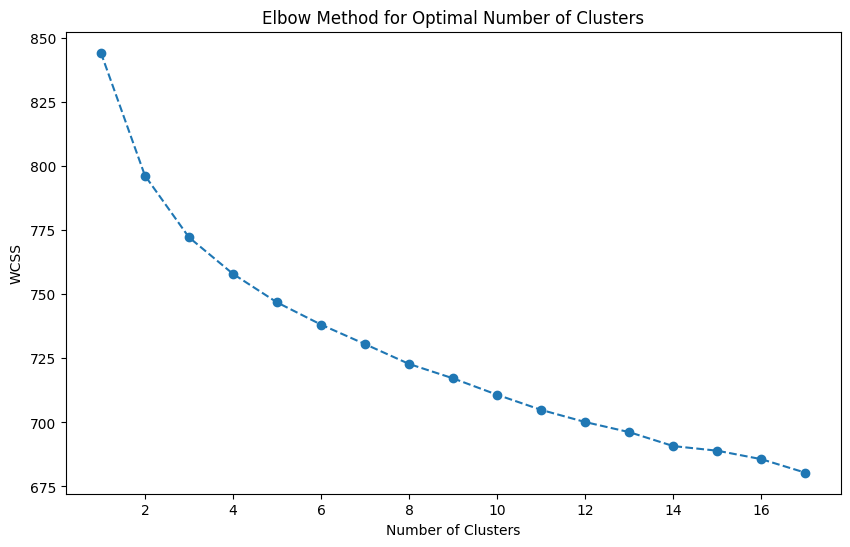

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store the WCSS for each number of clusters
wcss = []

# Test different numbers of clusters
for i in range(1, 18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 18), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Choose 5 clusters

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Step 3: Create a DataFrame to display the summarized reviews and their assigned cluster
df_clusters = pd.DataFrame({
    'Review': negative_reviews,
    'Cluster': cluster_labels
})

# Display the DataFrame
print(df_clusters)

# Step 4: Save the DataFrame to a CSV file if needed
df_clusters.to_csv("clustered_reviews.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                                                                                                                                                                                                                                                  Review  Cluster
0                                                  i am not a huge mcds lover but i have been to better ones this is by far the worst one i have ever been too it is filthy inside and if you get drive through they completely screw up your order every time the staff        4
1                                   terrible customer service i came in at 930pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes . There was no one else waiting for their food inside either just outside at the window        0
2                                               First they lost my order actually they gave it to someone one else than took 20 minutes to figure out why i was still waiting for 

## Summary

I have use a few machine learning algorithm to summarize , sentiment-analyze, and filter negative review. Then vectorized the reviews with embedding and clustered them into 5 groups with Kmean.

by looking analyzing each group

we can categorize the issue to be

0: Bad service : Attitude problem

1: Bad service : Do not like food

2: Bad service: Order issue

3: Bad experience: restuarant environment(cleaness, facilities issue)

4: slow service.



In [ ]:
# # commands to push everything to my github


# %cd /content/drive/MyDrive/Colab Notebooks/Splashtop
# !git init
# !git config --global user.name "ycbq999"
# !git config --global user.email "ycbq999@hotmail.com"
# # Replace 'username' and 'repository-name' with your GitHub username and the name of the new repository
# from getpass import getpass

# repo_name = 'ycbq999/Sentiment_Analysis_Splahtop_CustomerReview'
# token = getpass('Enter your GitHub token: ')
# git_url = f'https://{token}@github.com/{repo_name}.git'

# # Remove the existing remote
# # !git remote remove origin
# # Add the remote repository
# !git remote add origin {git_url}
# !git pull origin main --rebase

Enter your GitHub token: ··········


In [ ]:
# Add all files to the Git repository
!git add .

# Commit the changes
!git commit -m "Initial commit from Google Colab"

# Push to the remote repository on GitHub
!git branch -M main
!git push -u origin main